# <center>CSIS3290 - Section 070 - Machine Learning</center>
## <center>Mini Project 01 - *Group 01*</center>
### Abdrazak A.
### Kateryna Timonina 
### Scott L.
### Ricardo S.

## References

### Jupyter, Python and Markdown
- Python documentation: https://docs.python.org/3/
- Markdown Guide: https://www.markdownguide.org
- Jupyter Notebook: https://jupyter.org/documentation

### Libraries
- Pandas documentation: https://pandas.pydata.org/
- Seaborn: https://seaborn.pydata.org/index.html
- Stats Models: https://www.statsmodels.org/stable/index.html

### Regression Model
- Linear Regression in Python (by Mirko Stojiljkovic, 2020): https://realpython.com/linear-regression-in-python/
- A step-by-step guide to Simple and Multiple Linear Regression in Python (by Nikhil Adithyan, 2020): https://medium.com/codex/step-by-step-guide-to-simple-and-multiple-linear-regression-in-python-867ac9a30298

### Polynomial Regression
- Aurélien Géron (2019), _Hands-on Machine Learning with Scikit-Learn, Keras, and TensorFlow_, O'Reilly, 2ed, 130-132

## 1. Library import

In [1]:
#Importing libraries packages
import math as mlib #Math
import pandas as pd #Pandas
import numpy as np #NumPy
import matplotlib.pyplot as plt #MatPlotLib
import seaborn as sns #Seaborn
import statsmodels.api as sm #Stats Models

#Import Display from IPython
from IPython.display import display

#Import Linear Regression lib from Scikit-Learn package
from sklearn.linear_model import LinearRegression

# Import Model Selection lib from SkLearn package
from sklearn.model_selection import train_test_split

# Importing Metrics lib from Scikit-Learn package
from sklearn.metrics import mean_squared_error

# Importing Variance Threshold on Feature Selection lib from Scikit-Learn package
from sklearn.feature_selection import VarianceThreshold

#Importing Ridge and Lasso Regression Models
from sklearn.linear_model import Ridge as RidgeRegression
from sklearn.linear_model import Lasso as LassoRegression

# Importing Polynomial Features lib from Scikit-Learn package
from sklearn.preprocessing import PolynomialFeatures

# Importing Features Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Importing Pipeline from Scikit-Learn package
from sklearn.pipeline import Pipeline

#Set matplotlib output to be inline Jupyter
%matplotlib inline

## 2. Data loading

In [2]:
#Loading "unclean_data.csv" data source
#dsFile = pd.read_csv('unclean_data.csv', header=None, nrows=5) 
raw_ds = pd.read_csv('unclean_data.csv') 

#Checking Data Source File content - The unclean data file has 4007 rows, including the header, and 11 columns
print("Data Source File Shape:\n", raw_ds.shape)
print("Data Source File Head:\n", raw_ds.head()) 

Data Source File Shape:
 (4006, 11)
Data Source File Head:
       model    year     price transmission mileage fuel type engine size  \
0   C Class  2020.0   £30,495    Automatic     NaN    Diesel           2   
1   C Class  2020.0   £29,989    Automatic     NaN    Petrol         1.5   
2   C Class  2020.0   £37,899    Automatic     NaN    Diesel           2   
3   C Class  2019.0   £30,399    Automatic     NaN    Diesel           2   
4   C Class  2019.0   £29,899    Automatic     NaN    Diesel           2   

  mileage2 fuel type2 engine size2     reference  
0    1,200        NaN          NaN  /ad/25017331  
1    1,000        NaN          NaN  /ad/25043746  
2      500        NaN          NaN  /ad/25142894  
3    5,000        NaN          NaN  /ad/24942816  
4    4,500        NaN          NaN  /ad/24913660  


## 3.  Data Analysis, Preparation and Wrangling 

### 3.1 Handling missing rows

In [3]:
#Removing rows with all columns equal NaN
cleaning_df = raw_ds.dropna(how='all')

#Re-index the new data source
cleaning_df = cleaning_df.reset_index(drop=True)

#Checking new data source shape
print("Cleaning Data Source File Shape:\n", cleaning_df.shape)

Cleaning Data Source File Shape:
 (3907, 11)


### 3.2 Handling the currency symbols and comma format

In [4]:
#Define function to replace the string currency symbol and comma with empty  
def format_currency_string_number(pStrNumberCol):
    formatedStrCol = pStrNumberCol.str.replace(" £", "")
    formatedStrCol = formatedStrCol.str.replace(",", "")
    return formatedStrCol

#Call the function
formated_price_col = format_currency_string_number(cleaning_df["price"])

#Replace the old price column with the new values
#cleaning_df["price"] = formated_price_col
cleaning_df = cleaning_df.assign(price = formated_price_col)

#Convert column "price" to numeric
#cleaning_df["price"] = pd.to_numeric(cleaning_df["price"], errors='coerce')
cleaning_df["price"] = cleaning_df["price"].astype('float64')

#Rename column "price" to "Price" (fist letter upper case)
cleaning_df.rename(columns={"price": "Price"}, inplace=True)

#Check result
print("Cleaning File Head:\n", cleaning_df.head()) 
print("Cleaning File Shape:\n", cleaning_df.shape)

Cleaning File Head:
       model    year    Price transmission mileage fuel type engine size  \
0   C Class  2020.0  30495.0    Automatic     NaN    Diesel           2   
1   C Class  2020.0  29989.0    Automatic     NaN    Petrol         1.5   
2   C Class  2020.0  37899.0    Automatic     NaN    Diesel           2   
3   C Class  2019.0  30399.0    Automatic     NaN    Diesel           2   
4   C Class  2019.0  29899.0    Automatic     NaN    Diesel           2   

  mileage2 fuel type2 engine size2     reference  
0    1,200        NaN          NaN  /ad/25017331  
1    1,000        NaN          NaN  /ad/25043746  
2      500        NaN          NaN  /ad/25142894  
3    5,000        NaN          NaN  /ad/24942816  
4    4,500        NaN          NaN  /ad/24913660  
Cleaning File Shape:
 (3907, 11)


### 3.3 Handling non-valid column names

In [5]:
#Rename column name "fuel type" to "fuel_type"
cleaning_df.rename(columns={"fuel type": "fuel_type"}, inplace=True)

#Rename column name "fuel type2" to "fuel_type2"
cleaning_df.rename(columns={"fuel type2": "fuel_type2"}, inplace=True)

#Rename column name "engine size" to "engine_size"
cleaning_df.rename(columns={"engine size": "engine_size"}, inplace=True)

#Rename column name "engine size2" to "engine_size2"
cleaning_df.rename(columns={"engine size2": "engine_size2"}, inplace=True)

#Check result
print("Cleaning File Head:\n", cleaning_df.head(20))
print("Cleaning File Shape:\n", cleaning_df.shape)

Cleaning File Head:
        model    year    Price transmission  mileage fuel_type engine_size  \
0    C Class  2020.0  30495.0    Automatic      NaN    Diesel           2   
1    C Class  2020.0  29989.0    Automatic      NaN    Petrol         1.5   
2    C Class  2020.0  37899.0    Automatic      NaN    Diesel           2   
3    C Class  2019.0  30399.0    Automatic      NaN    Diesel           2   
4    C Class  2019.0  29899.0    Automatic      NaN    Diesel           2   
5    C Class  2020.0  30999.0    Automatic      NaN    Diesel           2   
6    C Class  2020.0  35999.0    Automatic      NaN    Diesel           2   
7    C Class  2019.0  37990.0    Automatic      NaN    Petrol           3   
8    C Class  2019.0  28990.0    Automatic      NaN    Diesel           2   
9    C Class  2019.0  28990.0    Automatic      NaN    Diesel           2   
10   C Class  2013.0   9995.0    Automatic   44,900        29        £160   
11   C Class  2012.0   6995.0    Automatic   88,200    

### 3.4 Handling missing values in columns: fuel_type

In [6]:
#Copy values from column "fuel_type" to "fuel_type2" when the value of "fuel_type2" is NaN
complete_fuel_type_col = cleaning_df.fuel_type2.fillna(cleaning_df.fuel_type)

#Replace the fuel_type2 column with the new values
cleaning_df = cleaning_df.assign(fuel_type2 = complete_fuel_type_col)

#Drop column "fuel_type"
cleaning_df = cleaning_df.drop("fuel_type", axis=1)

#Rename column name "fuel type2" to "fuel_type"
cleaning_df.rename(columns={"fuel_type2": "fuel_type"}, inplace=True)

#Check result
print("Cleaning File Head:\n", cleaning_df.head(10))
#print("Cleaning File Tail:\n", cleaning_df.tail(20))
print("Cleaning File Shape:\n", cleaning_df.shape)

Cleaning File Head:
       model    year    Price transmission mileage engine_size mileage2  \
0   C Class  2020.0  30495.0    Automatic     NaN           2    1,200   
1   C Class  2020.0  29989.0    Automatic     NaN         1.5    1,000   
2   C Class  2020.0  37899.0    Automatic     NaN           2      500   
3   C Class  2019.0  30399.0    Automatic     NaN           2    5,000   
4   C Class  2019.0  29899.0    Automatic     NaN           2    4,500   
5   C Class  2020.0  30999.0    Automatic     NaN           2    1,000   
6   C Class  2020.0  35999.0    Automatic     NaN           2      500   
7   C Class  2019.0  37990.0    Automatic     NaN           3    1,412   
8   C Class  2019.0  28990.0    Automatic     NaN           2    3,569   
9   C Class  2019.0  28990.0    Automatic     NaN           2    3,635   

  fuel_type engine_size2     reference  
0    Diesel          NaN  /ad/25017331  
1    Petrol          NaN  /ad/25043746  
2    Diesel          NaN  /ad/25142894  


### 3.5 Handling missing values and comma format in columns: mileage 

In [7]:
#Copy values from column "mileage2" to "mileage" when the value of "mileage" is NaN
complete_mileage_col = cleaning_df.mileage.fillna(cleaning_df.mileage2)

#Replace the mileage column with the new values
cleaning_df = cleaning_df.assign(mileage = complete_mileage_col)

#Drop column "mileage2"
cleaning_df = cleaning_df.drop("mileage2", axis=1)

#Check result
print("Cleaning File Head:\n", cleaning_df.head(10))
print("Cleaning File Shape:\n", cleaning_df.shape)

Cleaning File Head:
       model    year    Price transmission mileage engine_size fuel_type  \
0   C Class  2020.0  30495.0    Automatic   1,200           2    Diesel   
1   C Class  2020.0  29989.0    Automatic   1,000         1.5    Petrol   
2   C Class  2020.0  37899.0    Automatic     500           2    Diesel   
3   C Class  2019.0  30399.0    Automatic   5,000           2    Diesel   
4   C Class  2019.0  29899.0    Automatic   4,500           2    Diesel   
5   C Class  2020.0  30999.0    Automatic   1,000           2    Diesel   
6   C Class  2020.0  35999.0    Automatic     500           2    Diesel   
7   C Class  2019.0  37990.0    Automatic   1,412           3    Petrol   
8   C Class  2019.0  28990.0    Automatic   3,569           2    Diesel   
9   C Class  2019.0  28990.0    Automatic   3,635           2    Diesel   

  engine_size2     reference  
0          NaN  /ad/25017331  
1          NaN  /ad/25043746  
2          NaN  /ad/25142894  
3          NaN  /ad/24942816 

In [8]:
#Define function to replace the comma with empty  
def format_mileage_string_number(pStrNumberCol):
    return pStrNumberCol.str.replace(",", "")

#Call the function format_mileage_string_number
formated_mileage_col = format_mileage_string_number(cleaning_df["mileage"])

#Replace the old mileage column with the new values
cleaning_df = cleaning_df.assign(mileage = formated_mileage_col)

#Convert column "mileage" to numeric
cleaning_df["mileage"] = pd.to_numeric(cleaning_df["mileage"], errors='coerce')

#Rename column "mileage" to "Mileage" (fist letter upper case)
cleaning_df.rename(columns={"mileage": "Mileage"}, inplace=True)

#Check result
print("Cleaning File Head:\n", cleaning_df.head(10)) 
print("Cleaning File Shape:\n", cleaning_df.shape)

Cleaning File Head:
       model    year    Price transmission  Mileage engine_size fuel_type  \
0   C Class  2020.0  30495.0    Automatic   1200.0           2    Diesel   
1   C Class  2020.0  29989.0    Automatic   1000.0         1.5    Petrol   
2   C Class  2020.0  37899.0    Automatic    500.0           2    Diesel   
3   C Class  2019.0  30399.0    Automatic   5000.0           2    Diesel   
4   C Class  2019.0  29899.0    Automatic   4500.0           2    Diesel   
5   C Class  2020.0  30999.0    Automatic   1000.0           2    Diesel   
6   C Class  2020.0  35999.0    Automatic    500.0           2    Diesel   
7   C Class  2019.0  37990.0    Automatic   1412.0           3    Petrol   
8   C Class  2019.0  28990.0    Automatic   3569.0           2    Diesel   
9   C Class  2019.0  28990.0    Automatic   3635.0           2    Diesel   

  engine_size2     reference  
0          NaN  /ad/25017331  
1          NaN  /ad/25043746  
2          NaN  /ad/25142894  
3          NaN  /a

### 3.6 Handling missing values and different value standard in columns: engine_size 

In [9]:
#Copy values from column "engine_size" to "engine_size2" when the value of "engine_size2" is NaN
complete_engine_size_col = cleaning_df.engine_size2.fillna(cleaning_df.engine_size)

#Replace the engine_size2 column with the new values
cleaning_df = cleaning_df.assign(engine_size2 = complete_engine_size_col)

#Check result
print("Cleaning File Head:\n", cleaning_df.head(10)) 
print("Cleaning File Shape:\n", cleaning_df.shape)

Cleaning File Head:
       model    year    Price transmission  Mileage engine_size fuel_type  \
0   C Class  2020.0  30495.0    Automatic   1200.0           2    Diesel   
1   C Class  2020.0  29989.0    Automatic   1000.0         1.5    Petrol   
2   C Class  2020.0  37899.0    Automatic    500.0           2    Diesel   
3   C Class  2019.0  30399.0    Automatic   5000.0           2    Diesel   
4   C Class  2019.0  29899.0    Automatic   4500.0           2    Diesel   
5   C Class  2020.0  30999.0    Automatic   1000.0           2    Diesel   
6   C Class  2020.0  35999.0    Automatic    500.0           2    Diesel   
7   C Class  2019.0  37990.0    Automatic   1412.0           3    Petrol   
8   C Class  2019.0  28990.0    Automatic   3569.0           2    Diesel   
9   C Class  2019.0  28990.0    Automatic   3635.0           2    Diesel   

  engine_size2     reference  
0            2  /ad/25017331  
1          1.5  /ad/25043746  
2            2  /ad/25142894  
3            2  /a

In [10]:
#Define function to replace the "cc with empty  
def format_engine_size_string_number(pStrNumberCol):
    return pStrNumberCol.str.replace("CC", "")

#Call the function format_engine_size_string_number
formated_engine_size_col = format_engine_size_string_number(cleaning_df["engine_size2"])

#Replace the old engine_size2 column with the new values
cleaning_df = cleaning_df.assign(engine_size2 = formated_engine_size_col)

#Convert column "engine_size2" from string to numeric
cleaning_df["engine_size2"] = pd.to_numeric(cleaning_df["engine_size2"], errors='coerce')

#Apply lambda function to adjust engine size unit and round it to 1 decimal place
adjusted_engine_size2_col = cleaning_df["engine_size2"].apply(lambda x: round(x/1000, 1) if x > 1000 else round(x, 1))

#Replace the old engine_size2 column with the new values
cleaning_df = cleaning_df.assign(engine_size2 = adjusted_engine_size2_col)

#Drop column "engine_size"
cleaning_df = cleaning_df.drop("engine_size", axis=1)

#Rename column name "engine_size2" to "Engine_size"
cleaning_df.rename(columns={"engine_size2": "Engine_size"}, inplace=True)

#Check result
print("Cleaning File Head:\n", cleaning_df.head(10)) 
print("Cleaning File Shape:\n", cleaning_df.shape)

Cleaning File Head:
       model    year    Price transmission  Mileage fuel_type  Engine_size  \
0   C Class  2020.0  30495.0    Automatic   1200.0    Diesel          2.0   
1   C Class  2020.0  29989.0    Automatic   1000.0    Petrol          1.5   
2   C Class  2020.0  37899.0    Automatic    500.0    Diesel          2.0   
3   C Class  2019.0  30399.0    Automatic   5000.0    Diesel          2.0   
4   C Class  2019.0  29899.0    Automatic   4500.0    Diesel          2.0   
5   C Class  2020.0  30999.0    Automatic   1000.0    Diesel          2.0   
6   C Class  2020.0  35999.0    Automatic    500.0    Diesel          2.0   
7   C Class  2019.0  37990.0    Automatic   1412.0    Petrol          3.0   
8   C Class  2019.0  28990.0    Automatic   3569.0    Diesel          2.0   
9   C Class  2019.0  28990.0    Automatic   3635.0    Diesel          2.0   

      reference  
0  /ad/25017331  
1  /ad/25043746  
2  /ad/25142894  
3  /ad/24942816  
4  /ad/24913660  
5  /ad/25059312  
6  /a

### 3.7 Handling wrong data type: year

In [11]:
#Removing any remaining NaN in the Cleaning DataFrame
cleaning_df = cleaning_df.dropna()

#Convert the data type of the year column into integer
cleaning_df["year"] = cleaning_df["year"].astype('int64')

#Rename column "year" to "Year" (fist letter upper case)
cleaning_df.rename(columns={"year": "Year"}, inplace=True)

#Check result
print("Cleaning File Head:\n", cleaning_df.head(10))
print("Cleaning File Shape:\n", cleaning_df.shape)

Cleaning File Head:
       model  Year    Price transmission  Mileage fuel_type  Engine_size  \
0   C Class  2020  30495.0    Automatic   1200.0    Diesel          2.0   
1   C Class  2020  29989.0    Automatic   1000.0    Petrol          1.5   
2   C Class  2020  37899.0    Automatic    500.0    Diesel          2.0   
3   C Class  2019  30399.0    Automatic   5000.0    Diesel          2.0   
4   C Class  2019  29899.0    Automatic   4500.0    Diesel          2.0   
5   C Class  2020  30999.0    Automatic   1000.0    Diesel          2.0   
6   C Class  2020  35999.0    Automatic    500.0    Diesel          2.0   
7   C Class  2019  37990.0    Automatic   1412.0    Petrol          3.0   
8   C Class  2019  28990.0    Automatic   3569.0    Diesel          2.0   
9   C Class  2019  28990.0    Automatic   3635.0    Diesel          2.0   

      reference  
0  /ad/25017331  
1  /ad/25043746  
2  /ad/25142894  
3  /ad/24942816  
4  /ad/24913660  
5  /ad/25059312  
6  /ad/25418851  
7  /ad/25

### 3.8 Handling unneeded columns

In [12]:
#Drop column "model"
cleaning_df = cleaning_df.drop("model", axis=1)

#Drop column "reference"
cleaning_df = cleaning_df.drop("reference", axis=1)

#Check result
print("Cleaning File Head:\n", cleaning_df.head(10))

Cleaning File Head:
    Year    Price transmission  Mileage fuel_type  Engine_size
0  2020  30495.0    Automatic   1200.0    Diesel          2.0
1  2020  29989.0    Automatic   1000.0    Petrol          1.5
2  2020  37899.0    Automatic    500.0    Diesel          2.0
3  2019  30399.0    Automatic   5000.0    Diesel          2.0
4  2019  29899.0    Automatic   4500.0    Diesel          2.0
5  2020  30999.0    Automatic   1000.0    Diesel          2.0
6  2020  35999.0    Automatic    500.0    Diesel          2.0
7  2019  37990.0    Automatic   1412.0    Petrol          3.0
8  2019  28990.0    Automatic   3569.0    Diesel          2.0
9  2019  28990.0    Automatic   3635.0    Diesel          2.0


### 3.9 Handling categorical data

In [13]:
#Rename "Other" values in "transmission" column to "Other_Transmission"
#cleaning_df.loc[cleaning_df["transmission"] == "Other", "transmission"] = "Other_Transmission" 
cleaning_df["transmission"] = cleaning_df["transmission"].apply(lambda x: "Other_Transmission" if x == "Other" else x)

#Creating dummies for column "transmission"
transmission_dummies = pd.get_dummies(cleaning_df["transmission"])

#Adding transmission dummies columns to the cleaning dataframe
cleaning_df = cleaning_df.join(transmission_dummies)

#Rename "Other" values in "fuel_type" column to "Other_Fuel_Type"
cleaning_df["fuel_type"] = cleaning_df["fuel_type"].apply(lambda x: "Other_Fuel_Type" if x == "Other" else x)

#Creating dummies for column "fuel_type"
fuel_type_dummies = pd.get_dummies(cleaning_df["fuel_type"])

#Adding fuel_type dummies columns to the cleaning dataframe
cleaning_df = cleaning_df.join(fuel_type_dummies)

#Removing original categorical column "transmission"
cleaning_df = cleaning_df.drop("transmission", axis=1)

#Removing original categorical column "fuel_type"
cleaning_df = cleaning_df.drop("fuel_type", axis=1)

#Check result
print("Cleaning File Head:\n", cleaning_df.head(10))
print("Cleaning File Shape:\n", cleaning_df.shape)

Cleaning File Head:
    Year    Price  Mileage  Engine_size  Automatic  Manual  Other_Transmission  \
0  2020  30495.0   1200.0          2.0          1       0                   0   
1  2020  29989.0   1000.0          1.5          1       0                   0   
2  2020  37899.0    500.0          2.0          1       0                   0   
3  2019  30399.0   5000.0          2.0          1       0                   0   
4  2019  29899.0   4500.0          2.0          1       0                   0   
5  2020  30999.0   1000.0          2.0          1       0                   0   
6  2020  35999.0    500.0          2.0          1       0                   0   
7  2019  37990.0   1412.0          3.0          1       0                   0   
8  2019  28990.0   3569.0          2.0          1       0                   0   
9  2019  28990.0   3635.0          2.0          1       0                   0   

   Semi-Auto  Diesel  Hybrid  Other_Fuel_Type  Petrol  
0          0       1       0   

### 3.10 Saving the cleaned data into csv

In [14]:
#Checking the cleaning dataframe before write the output file
print("Cleaned Dataframe File Shape:\n", cleaning_df.shape)
print("Cleaned Dataframe File Data Types:\n", cleaning_df.dtypes)

#Write cleaning dataframe to a new CSV file named "cleaned_data.csv"
cleaning_df.to_csv('cleaned_data.csv', index=False)

Cleaned Dataframe File Shape:
 (3899, 12)
Cleaned Dataframe File Data Types:
 Year                    int64
Price                 float64
Mileage               float64
Engine_size           float64
Automatic               uint8
Manual                  uint8
Other_Transmission      uint8
Semi-Auto               uint8
Diesel                  uint8
Hybrid                  uint8
Other_Fuel_Type         uint8
Petrol                  uint8
dtype: object


In [15]:
#Loading "clean_data.csv" data source to input Data Frame
input_df = pd.read_csv('cleaned_data_Ricardo.csv')

#Improving the order of the columns
input_df =input_df[input_df.columns[[0,2,3,4,5,7,6,8,9,11,10,1]]]

#Checking Cleaned Data Source File content
print("The cleaned Data Frame has {} data objects with {} attributes each.\n".format(*input_df.shape))
print("Data Frame Head:\n", input_df.head()) 

The cleaned Data Frame has 3899 data objects with 12 attributes each.

Data Frame Head:
    Year  Mileage  Engine_size  Automatic  Manual  Semi-Auto  \
0  2020   1200.0          2.0          1       0          0   
1  2020   1000.0          1.5          1       0          0   
2  2020    500.0          2.0          1       0          0   
3  2019   5000.0          2.0          1       0          0   
4  2019   4500.0          2.0          1       0          0   

   Other_Transmission  Diesel  Hybrid  Petrol  Other_Fuel_Type    Price  
0                   0       1       0       0                0  30495.0  
1                   0       0       0       1                0  29989.0  
2                   0       1       0       0                0  37899.0  
3                   0       1       0       0                0  30399.0  
4                   0       1       0       0                0  29899.0  


After cleaning the raw data in previous steps (separeted code), the input data frame been used to build the models has 3899 rows and 12 attributes (columns). The available attributes are:

- Year: year of production
- Mileage: mileage when resale
- Engine_size: size of the car engine

Types of Transmission:
- Automatic
- Manual
- Semi-Auto
- Other_Transmission

Types of Fuel:
- Diesel
- Hybrid
- Petrol
- Other_Fuel_Type

Depedent Field
- Price: resale price

## 4.  Exploratory Data Analysis (EDA) and Visualization

In [16]:
# Checking the general data statistics of each attribute
display(input_df.describe())

,Year,Mileage,Engine_size,Automatic,Manual,Semi-Auto,Other_Transmission,Diesel,Hybrid,Petrol,Other_Fuel_Type,Price
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,2017.338548,22395.709156,2.036779,0.417543,0.051039,0.531162,0.000256,0.600154,0.038728,0.359579,0.001539,23674.286997
std,2.213416,22630.438426,0.487869,0.493217,0.220105,0.499092,0.016015,0.489929,0.192970,0.479939,0.039203,8960.218218
min,1991.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1290.000000
25%,2016.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17690.000000
50%,2018.000000,14640.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,22980.000000
75%,2019.000000,32458.500000,2.100000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,28900.000000
max,2020.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,88995.000000


The attributes Year, Price, Mileage, and Engine_size are numeric values representing interval data. In this case, Year, Price, and Mileage are considered whole values. Engine_size is a ratio value.

On the other hand, the other attributes are categorical values that were vectorized using a bollean representation to indicate the respective Transmission and Fuel Type of each car.

Before creating the model, the numerical values should be analyzed to eliminate outliers and check the relevance of each attribute to the entire dataset. 

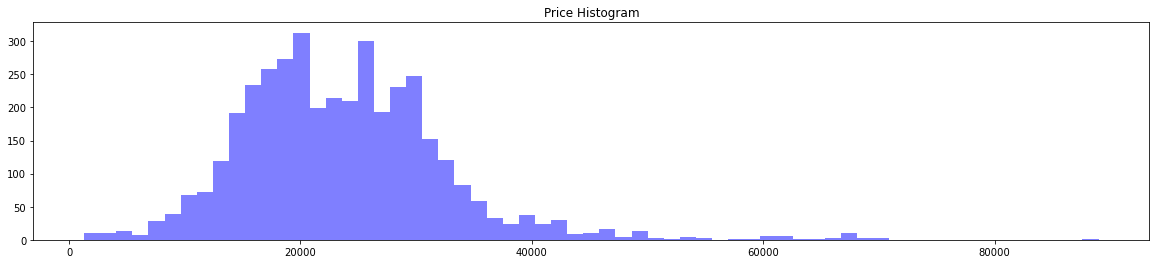

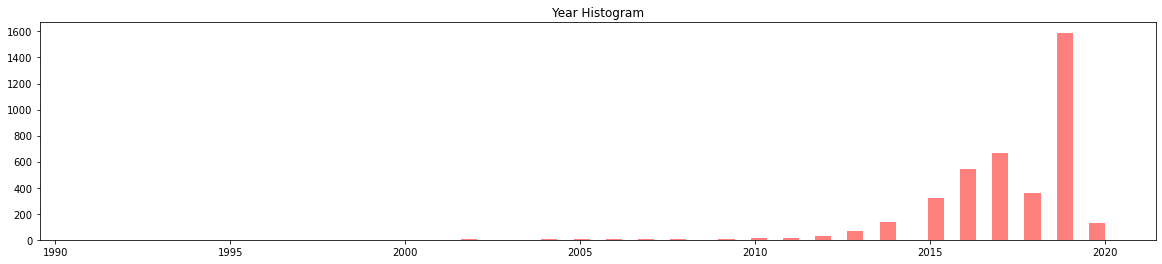

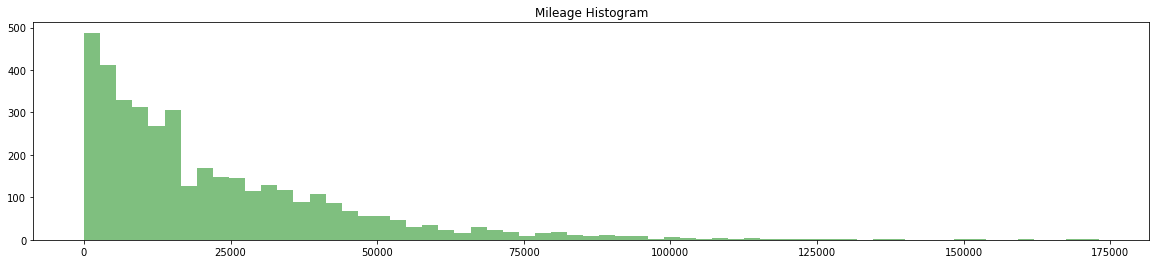

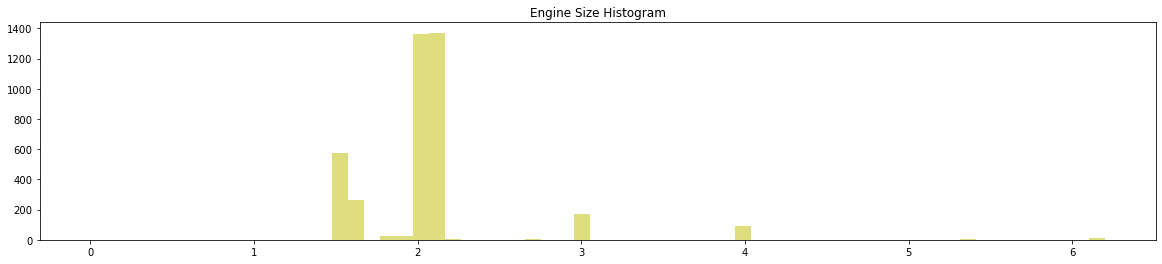

In [17]:
#Ploting histogram of the attributes

#Price Hist
plt.figure(figsize=(20, 4))
x_vector = input_df["Price"]
n_bins = mlib.sqrt(x_vector.size); n_bins = mlib.ceil(n_bins)
plt.hist(x_vector, bins=n_bins, color='b', alpha=0.5)
plt.title('Price Histogram')
plt.show()

#Year Hist
plt.figure(figsize=(20, 4))
x_vector = input_df["Year"]
n_bins = mlib.sqrt(x_vector.size); n_bins = mlib.ceil(n_bins)
plt.hist(x_vector, bins=n_bins, color='r', alpha=0.5)
plt.title('Year Histogram')
plt.show()

#Mileage
plt.figure(figsize=(20, 4))
x_vector = input_df["Mileage"]
n_bins = mlib.sqrt(x_vector.size); n_bins = mlib.ceil(n_bins)
plt.hist(x_vector, bins=n_bins, color='g', alpha=0.5)
plt.title('Mileage Histogram')
plt.show()

#Engine Size
plt.figure(figsize=(20, 4))
x_vector = input_df["Engine_size"]
n_bins = mlib.sqrt(x_vector.size); n_bins = mlib.ceil(n_bins)
plt.hist(x_vector, bins=n_bins, color='y', alpha=0.5)
plt.title('Engine Size Histogram')
plt.show()

**4.1 Removing Price Outliers**

In [18]:
# Removing rows with Price greater than 80000
input_df.drop(input_df.loc[ input_df["Price"] > 80000].index, inplace=True)

**4.2 Removing Year Outliers**

In [19]:
# Removing rows with Year before 2000
input_df.drop(input_df.loc[ input_df["Year"] < 2000].index, inplace=True)

**4.3 Removing Mileage Outliers**

In [20]:
# Removing rows with Mileage greater than 160000
input_df.drop(input_df.loc[ input_df["Mileage"]>160000].index, inplace = True)

In [21]:
#Checking Data Frame after removing outliers
print("The Data Frame has {} data objects with {} attributes each after removing outliers.\n".format(*input_df.shape))

The Data Frame has 3893 data objects with 12 attributes each after removing outliers.



## 5. Feature Observation and Hypothesis

Considering a general scenario of car resale, it is possible to predict the relationship between the resale price and the characteristics of the car when it is been negotiated: 

1. Price x Year: Newer cars usually have higher resale prices.
2. Price x Mileage: Cars with lower mileage usually are more preserved and usually have higher resale prices.
3. Price x Engine Size: More powered cars (higher engine size) usually are more expensive. So, usually have higher resale prices.

Next step is evaluating the correlation between Attributes (independent variables) and Price (dependent Variable).

In [22]:
#Checking the general correlation between the variables
#Obs.: Higher absolute correlation values (> 0.5) indicates high correlation
display(input_df.corr())

,Year,Mileage,Engine_size,Automatic,Manual,Semi-Auto,Other_Transmission,Diesel,Hybrid,Petrol,Other_Fuel_Type,Price
Year,1.000000,-0.769406,-0.161441,-0.200350,-0.174565,0.276314,-0.040622,-0.148847,-0.102075,0.193847,-0.009773,0.689477
Mileage,-0.769406,1.000000,0.095375,0.179191,0.227080,-0.277803,0.016298,0.185064,0.196099,-0.271667,0.046489,-0.684640
Engine_size,-0.161441,0.095375,1.000000,0.076730,-0.049373,-0.055045,0.031790,-0.030779,-0.001576,0.032293,-0.002877,0.373222
Automatic,-0.200350,0.179191,0.076730,1.000000,-0.196257,-0.901028,-0.013554,0.022639,0.089169,-0.062802,0.046465,-0.094956
Manual,-0.174565,0.227080,-0.049373,-0.196257,1.000000,-0.247326,-0.003720,0.029737,-0.046625,-0.010848,-0.009119,-0.243442
Semi-Auto,0.276314,-0.277803,-0.055045,-0.901028,-0.247326,1.000000,-0.017081,-0.035914,-0.067425,0.067227,-0.041866,0.201949
Other_Transmission,-0.040622,0.016298,0.031790,-0.013554,-0.003720,-0.017081,1.000000,0.013072,-0.003220,-0.011999,-0.000630,-0.021106
Diesel,-0.148847,0.185064,-0.030779,0.022639,0.029737,-0.035914,0.013072,1.000000,-0.246317,-0.917858,-0.048175,-0.256720
Hybrid,-0.102075,0.196099,-0.001576,0.089169,-0.046625,-0.067425,-0.003220,-0.246317,1.000000,-0.150368,-0.007892,-0.113190
Petrol,0.193847,-0.271667,0.032293,-0.062802,-0.010848,0.067227,-0.011999,-0.917858,-0.150368,1.000000,-0.029409,0.309019


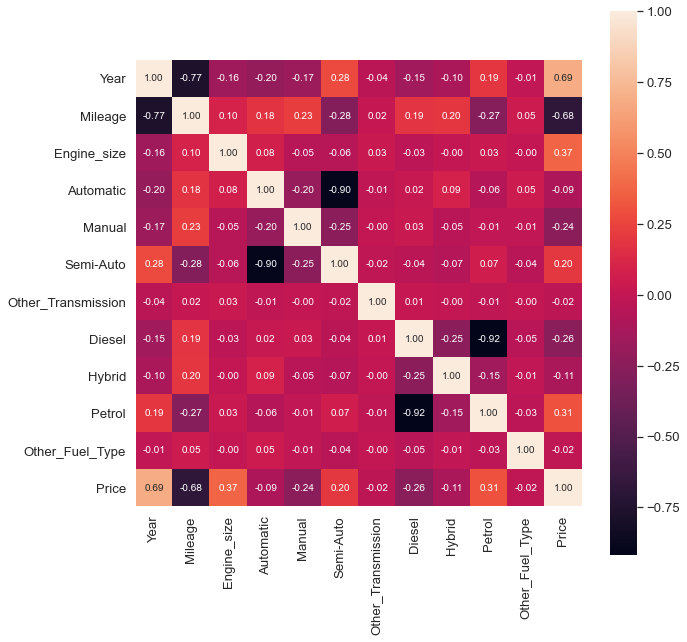

In [23]:
# Calculate and show correlation matrix between Price x Year x Mileage x Engine Size
calc_matrix = np.corrcoef(input_df.values.T) #We are using the numpy vector here
sns.set(font_scale=1.2, rc={'figure.figsize':(10,10)})
heat_map = sns.heatmap(calc_matrix,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':10},
                yticklabels=input_df.columns,
                xticklabels=input_df.columns)

#<TODO> improve size

**Checking the Correlation Results between dependent variable (Price) and independent variables (other)**

- Price x Year has high correlation -> 0.689477
- Price x Mileage has high correlation -> -0.684640
- Price x Engine Size has low correlation -> 0.373222

- Price x Transmission Type has low correlation -> all at least lower than 0.23 
- Price x Fuel Type has low correlation -> all at least lower than 0.31

**Checking Multicollinearity (Correlationbetween independent variables)**
- Year x Mileage has high correlation -> -0.769406

In [24]:
#Perform the general scatter plot between attributes  
#sns.pairplot(input_df, height=2.5, vars=["Year", "Price", "Mileage", "Engine_size"])
#plt.tight_layout()

**Applying Threshold Feature Filtering**

In [25]:
#Defining Variance Threshold level (features with too low variance does not really affect the dependent variable)
varT = VarianceThreshold(threshold=0.2)
varT.fit(input_df)

#Checking features that are accepted
display(pd.DataFrame({"Variance": varT.variances_, "Select_feature": varT.get_support()}, index=input_df.columns).T)

,Year,Mileage,Engine_size,Automatic,Manual,Semi-Auto,Other_Transmission,Diesel,Hybrid,Petrol,Other_Fuel_Type,Price
Variance,4.47219,4.86468e+08,0.236462,0.243095,0.0485044,0.248994,0.000256805,0.239887,0.0372831,0.230149,0.00153885,7.87903e+07
Select_feature,True,True,True,True,False,True,False,True,False,True,False,True


Considering a threshold variance level of 0.2, the features Transmission_Type Manual and Other_Transmission, and Fuel_Type Hybrid and Other_Fuel_Type are not good to modeling.

### 5.1 Checking Correlation and Linear Regression between Price and Year

The linear model is: y = -5.8145e+06 + 2894.0*X


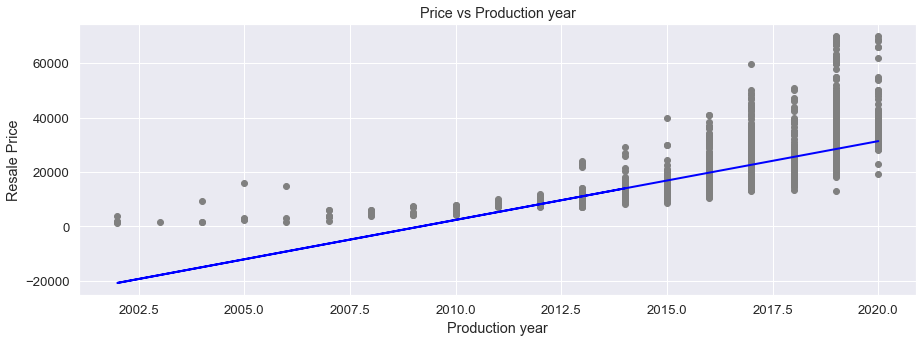

In [26]:
# Finding the linear equation for the Price vs Production year of the cars
X = input_df['Year'].values.reshape(-1,1)
y = input_df['Price'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: y = {:.5} + {:.5}*X".format(reg.intercept_[0], reg.coef_[0][0]))

# Plot the linear equation on the scatter plot to see how it fits the data set
predictions = reg.predict(X)
plt.figure(figsize=(15, 5))
plt.scatter(input_df['Year'], input_df['Price'], c='grey')
plt.plot(input_df['Year'], predictions, c='blue', linewidth=2)
plt.title("Price vs Production year")
plt.xlabel("Production year")
plt.ylabel("Resale Price")
plt.show()

The scatter plot and linear regression curve confirms the expected relationship between Price and Year.

### 5.3 Checking Correlation and Linear Regression between Price  and Mileage

The linear model is: y = 2.9805e+04 + -0.27553*X


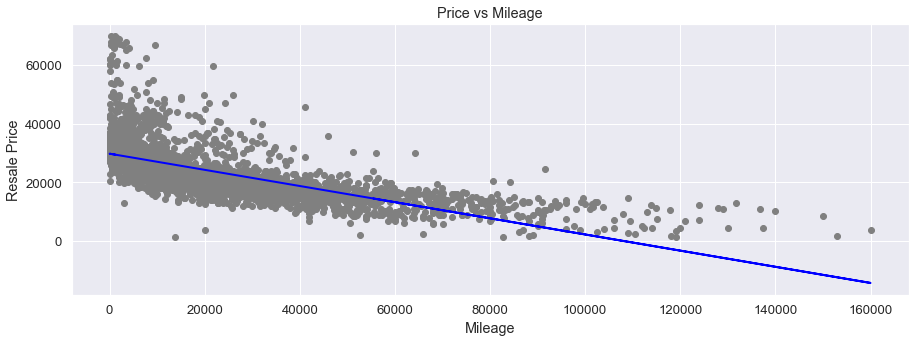

In [27]:
# Finding the linear equation for the Price vs Mileage
X = input_df['Mileage'].values.reshape(-1,1)
y = input_df['Price'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: y = {:.5} + {:.5}*X".format(reg.intercept_[0], reg.coef_[0][0]))

# Plot the linear equation on the scatter plot to see how it fits the data set
predictions = reg.predict(X)
plt.figure(figsize=(15, 5))
plt.scatter(input_df['Mileage'], input_df['Price'], c='grey')
plt.plot(input_df['Mileage'], predictions, c='blue', linewidth=2)
plt.title("Price vs Mileage")
plt.xlabel("Mileage")
plt.ylabel("Resale Price")
plt.show()

The scatter plot and linear regression curve confirms the expected relationship between Price and Mileage.

### 5.5 Checking Correlation and Linear Regression between Price and Engine Size

The linear model is: y = 9814.8 + 6812.8*X


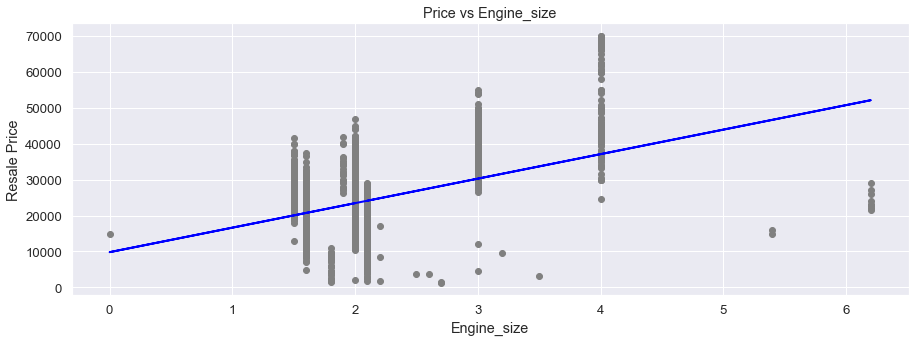

In [28]:
# Finding the linear equation for the Price vs Engine Size
X = input_df['Engine_size'].values.reshape(-1,1)
y = input_df['Price'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: y = {:.5} + {:.5}*X".format(reg.intercept_[0], reg.coef_[0][0]))

# Plot the linear equation on the scatter plot to see how it fits the data set
predictions = reg.predict(X)
plt.figure(figsize=(15, 5))
plt.scatter(input_df['Engine_size'], input_df['Price'], c='grey')
plt.plot(input_df['Engine_size'], predictions, c='blue', linewidth=2)
plt.title("Price vs Engine_size")
plt.xlabel("Engine_size")
plt.ylabel("Resale Price")
plt.show()

Based on the scatter plot, the expected relationship between Price and Engine Size is confirmed. However, this attribute appears do not have a strong relationship with the resale price.

### 5.6 Checking Correlation between Price  and Transmission Type

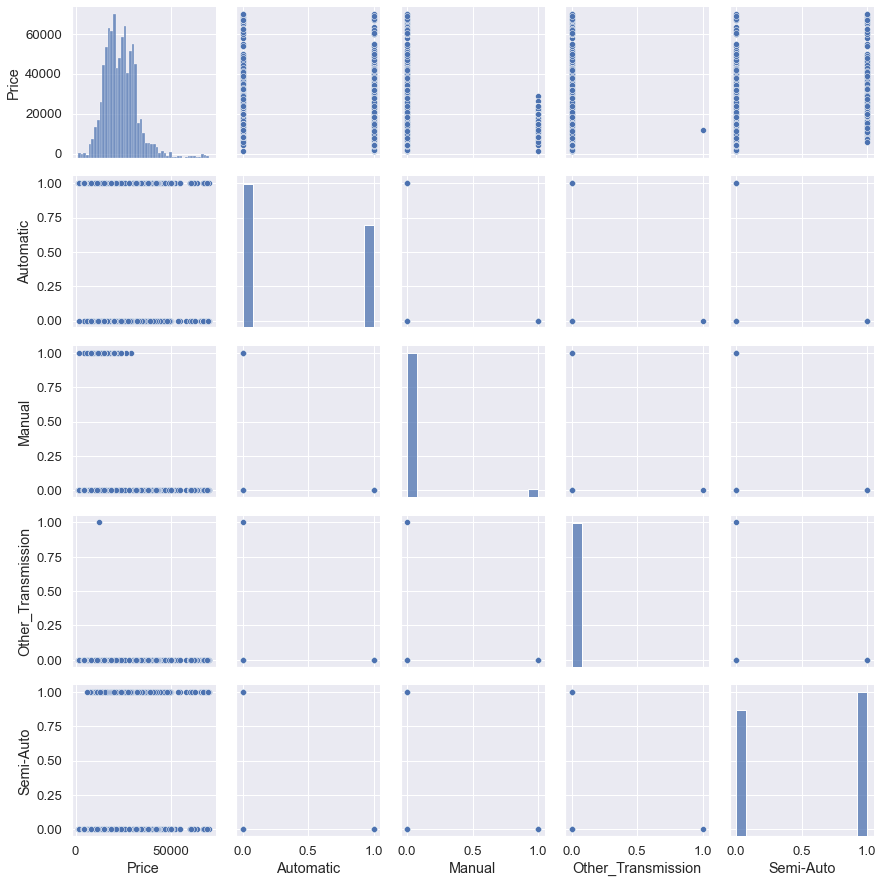

In [29]:
#Perform the geenral scatter plot between attributes  
sns.pairplot(input_df, height=2.5, vars=["Price", "Automatic","Manual","Other_Transmission","Semi-Auto"])
plt.tight_layout()

Based on the correlation and scatter plts, it seems that there is no strong relationship between the Transmission Type and the Resale Price.

### 5.7 Checking Correlation between Price  and Fuel Type

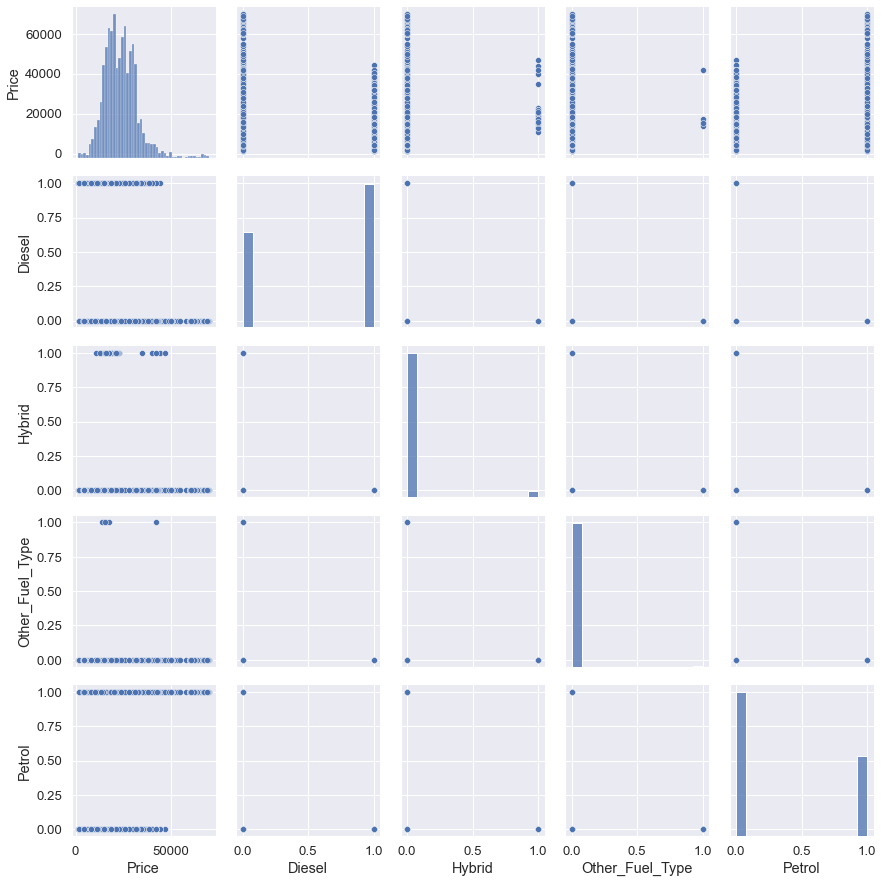

In [30]:
#Perform the scatter plot between Price and Fuel type  
sns.pairplot(input_df, height=2.5, vars=["Price", "Diesel","Hybrid","Other_Fuel_Type","Petrol"])
plt.tight_layout()

Based on the correlation and scatter plts, it seems that there is no strong relationship between the Fuel Type and the Resale Price.

### 5.8 Checkin for Feature Transformation Requirements and Removing Weak Correlated Features (Attributes)

Based on the correlation and visual analysis performed, only the features Year, Mileage, and Engine Size have a strong correlation with the Resale Price. For this reason, the other features will not be considered for modeling purposes and will dropped.

In [31]:
#Holding the Data Set with all the features to be used in Item 7 (Ridge and Lasso Modeling)
input_all_features_df = input_df.copy()

#Removing Transmission Types attributes (Automatic, Manual, Other_Transmission, Semi-Auto)
input_df.drop("Automatic", axis=1, inplace=True)
input_df.drop("Manual", axis=1, inplace=True)
input_df.drop("Other_Transmission", axis=1, inplace=True)
input_df.drop("Semi-Auto", axis=1, inplace=True)

#Removing Fuel Type attrinutes (Diesel, Hybrid, Other_Fuel_Type, Petrol)
input_df.drop("Diesel", axis=1, inplace=True)
input_df.drop("Hybrid", axis=1, inplace=True)
input_df.drop("Other_Fuel_Type", axis=1, inplace=True)
input_df.drop("Petrol", axis=1, inplace=True)

**Checking Data Frame before Modeling step** 

In [32]:
print("The Data Frame has {} data objects with {} attributes each after removing weak correlated features.\n".format(*input_df.shape))
print("Data frame head:\n")
display(input_df.head(10))

The Data Frame has 3893 data objects with 4 attributes each after removing weak correlated features.

Data frame head:



,Year,Mileage,Engine_size,Price
0,2020,1200.0,2.0,30495.0
1,2020,1000.0,1.5,29989.0
2,2020,500.0,2.0,37899.0
3,2019,5000.0,2.0,30399.0
4,2019,4500.0,2.0,29899.0
5,2020,1000.0,2.0,30999.0
6,2020,500.0,2.0,35999.0
7,2019,1412.0,3.0,37990.0
8,2019,3569.0,2.0,28990.0
9,2019,3635.0,2.0,28990.0


## 6. Modeling using Simple Linear Regression 

**Our next step will be evaluate a few models using different combinations of the remaining features. We will look at:**
- P-values (in case p-value of the feature is less than 0,05 means that the feature is statistically significant and can be used to predict the price of the cars)


- R-squared (multiple coefficient of determination)- in case the models contain only statistically significant features(independent variables) the better model will be those which has the highest R-squared, because R-squared determines the percentage of the variation in the dependent variable( cars' price in our case) that is explained by all of independent variables (our features)

### 6.1 Analyzing Preliminar Modeling results applying OLS (Ordinary Least Squares) regression

**Model 1 - Checking results using attributes Year, Mileage, Engine Size**

In [33]:
#Check Model 1
X = np.column_stack((input_df['Year'], input_df['Mileage'], input_df['Engine_size']))
y = input_df['Price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     4207.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:44:14   Log-Likelihood:                -38102.
No. Observations:                3893   AIC:                         7.621e+04
Df Residuals:                    3889   BIC:                         7.624e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.259e+06   1.04e+05    -40.832      0.0

**Model 2 - Checking results using attributes Year, Mileage**

In [34]:
#Check Model 2
X = np.column_stack((input_df['Year'], input_df['Mileage']))
y = input_df['Price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     2225.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:44:14   Log-Likelihood:                -39431.
No. Observations:                3893   AIC:                         7.887e+04
Df Residuals:                    3890   BIC:                         7.889e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -3.35e+06   1.45e+05    -23.059      0.0

**Model 3 - Checking results using attribute Mileage**

In [35]:
#Check Model 3
X = input_df['Mileage']
y = input_df['Price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     3433.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:44:14   Log-Likelihood:                -39685.
No. Observations:                3893   AIC:                         7.937e+04
Df Residuals:                    3891   BIC:                         7.939e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.98e+04    147.224    202.445      0.0

**Model 4 - Checking results using attribute Year**

In [36]:
#Check Model 4
X = input_df['Year']
y = input_df['Price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     3526.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:44:14   Log-Likelihood:                -39660.
No. Observations:                3893   AIC:                         7.932e+04
Df Residuals:                    3891   BIC:                         7.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.815e+06   9.83e+04    -59.137      0.0

**Model 5 - Checking results using attributes Year and Engine Size**

In [37]:
#Check Model 5
X = np.column_stack((input_df['Year'], input_df['Engine_size']))
y = input_df['Price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     4914.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:44:14   Log-Likelihood:                -38463.
No. Observations:                3893   AIC:                         7.693e+04
Df Residuals:                    3890   BIC:                         7.695e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.513e+06   7.33e+04    -88.844      0.0

**Model 6 - Checking results using attributes Mileage and Engine Size**

In [38]:
#Check Model 6
X = np.column_stack((input_df['Mileage'], input_df['Engine_size']))
y = input_df['Price']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3823.
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:44:14   Log-Likelihood:                -38800.
No. Observations:                3893   AIC:                         7.761e+04
Df Residuals:                    3890   BIC:                         7.762e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.374e+04    359.255     38.241      0.0

**OLS Analysis Conclusion**
Based on the OLS results, all independent variables in the model are statistically significant.

Next, for the futher analysis and training the regression model, we will choose 2 models which have the highest R-squared:
- Model 1 (independent variables are Year, Mileage, Engine_size) with R-squared = 0.764
- Model 5 (independent variables are Year, Engine_size) with R-squared = 0.716

### 6.2 Performing the Simple Linear Regression Model using Year, Mileage, and Engine Size

**Dividing Independent and Dependent Variables**

- Dependent Variable: Price
- Independent Variable: Other attributes (Year, Mileage, Engine Size)

In [39]:
# Divide the dataset into features (independent variables) and response (dependent variable)
response_ds = input_df["Price"]
features_ds = input_df.drop("Price", axis=1) #remove the dependent var from the feature dataset

**Performing Feature Scaling**

In [40]:
#Define Scaler Transformation
stdScaler = StandardScaler()

#Scales the features using Standardization (z-score)
zscore = stdScaler.fit_transform(features_ds)

#Create DataFrame again to recover columns names
features_ds = pd.DataFrame(zscore, index=features_ds.index, columns=features_ds.columns)
features_ds = features_ds.reset_index(drop=True)
display(features_ds.head())

,Year,Mileage,Engine_size
0,1.248672,-0.952972,-0.073215
1,1.248672,-0.962040,-1.101443
2,1.248672,-0.984709,-0.073215
3,0.775804,-0.780683,-0.073215
4,0.775804,-0.803353,-0.073215


**Spliting Dataset into Traning Data and Test Data**

In [41]:
#Split the data into different data frames randomly using random seed = 27 and relation training:test = 75:25 
X_train, X_test, Y_train, Y_test = train_test_split(features_ds, response_ds, test_size=0.25, random_state=27)

print("Train and testing data frames were split successfully")

print("X_train Shape:", X_train.shape, "\n")
print("Y_train Shape:", Y_train.shape, "\n")

print("X_test Shape:", X_test.shape, "\n")
print("Y_test Shape:", Y_test.shape, "\n")

Train and testing data frames were split successfully
X_train Shape: (2919, 3) 

Y_train Shape: (2919,) 

X_test Shape: (974, 3) 

Y_test Shape: (974,) 



**Training Model using Simple Linear Regression**

In [42]:
#Applying the Linear Regression algorithm to train the model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)

print("Simple Linear Regression Model training done!")

Simple Linear Regression Model training done!


**Testing created Simple Linear Regression Model**

In [43]:
# Applying Test data frame and computing predictions running the Simple Regression Model 
linear_regression_model_predictions = linear_regression_model.predict(X_test)

print("Simple Linear Regression Model testing done!")

Simple Linear Regression Model testing done!


**Checking the Model performance by comparing Coefficient of Determination (R^2) between Training and Test, and evaluating RMSE Root Mean Squared Error)**

In [44]:
# Computing the R^2 (Coefficient of Determination)
r2_train = linear_regression_model.score(X_train, Y_train)
print("Coefficient of Determination (R^2) in Linear Regression Training set is:", r2_train)

r2_test = linear_regression_model.score(X_test, Y_test)
print("Coefficient of Determination (R^2) in Linear Regression Test set is:", r2_test)

Coefficient of Determination (R^2) in Linear Regression Training set is: 0.7728755111094597
Coefficient of Determination (R^2) in Linear Regression Test set is: 0.7361555786000181


In [45]:
#Computing the RMSE (Root Mean Squared Error)
#Obs.: Usually, if we have a small RMSE, the model performance is good
mse = mean_squared_error(Y_test, linear_regression_model_predictions)

#calculate the square root of the mean_squared_error
linear_regression_model_RMSE = mse**0.5

print("The RMSE of the Linear Regression Model is:", linear_regression_model_RMSE)

The RMSE of the Linear Regression Model is: 4431.701342929494


**Comparing by plot the results**

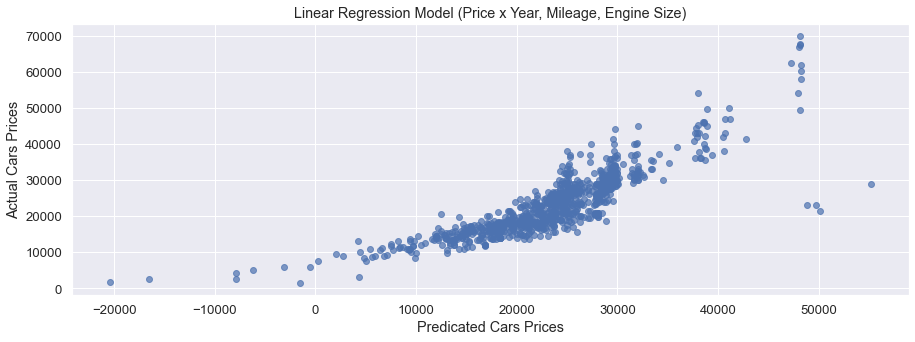

In [46]:
# Ploting the model predictions x actual values
actual_values = Y_test

plt.figure(figsize=(15, 5))
plt.scatter(linear_regression_model_predictions, actual_values, alpha=.7, color='b')
plt.title("Linear Regression Model (Price x Year, Mileage, Engine Size)")
plt.xlabel("Predicated Cars Prices")
plt.ylabel("Actual Cars Prices")

plt.show()

**Printing a distribution plot comparing the results**

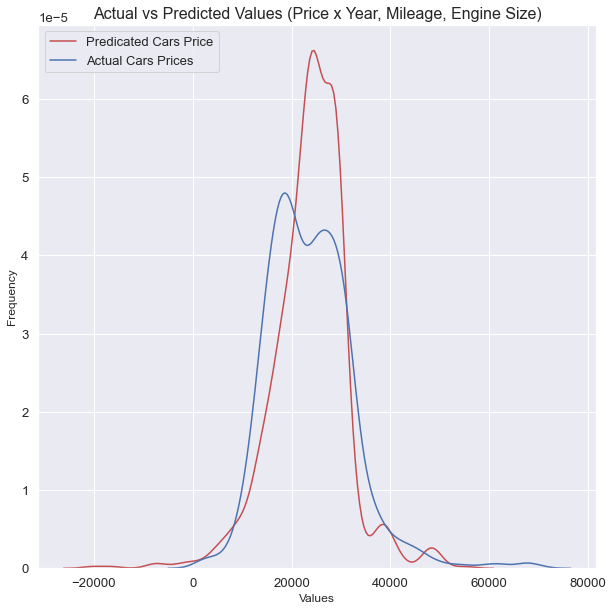

In [47]:
# Ploting distributon comparing predictions x actual values
sns.kdeplot(linear_regression_model_predictions, color = 'r', label = "Predicated Cars Price")
sns.kdeplot(actual_values, color = 'b', label = "Actual Cars Prices")
sns.set(rc={'figure.figsize':(15,5)})

plt.title('Actual vs Predicted Values (Price x Year, Mileage, Engine Size)', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.show()

**Printing the obtained Linear Regression Model coefficients**

In [48]:
# Getting the Linear Regression Model coefficient list
feat = list(X_train.columns)
coef = linear_regression_model.coef_.transpose() #coef_ is a internal vector of the model with the Coefficients
coef_table = np.vstack((feat, coef)).T
linear_regression_feature_coeff_df = pd.DataFrame(coef_table, columns=["Feature", "Coefficients"])

print("The Linear Regression Coefficients per Feature are:\n", linear_regression_feature_coeff_df)

The Linear Regression Coefficients per Feature are:
        Feature         Coefficients
0         Year    4478.520047281703
1      Mileage  -3025.9767527752206
2  Engine_size    4457.409073974074


### 6.3 Performing the Simple Linear Regression Model using Year and Engine Size

**Removing attribute Mileage**

In [49]:
input_df_2 = input_df.drop(['Mileage'], axis = 1)

**Dividing Independent and Dependent Variables**

- Dependent Variable: Price
- Independent Variable: Other attributes (Year, Engine Size)

In [50]:
# Divide the dataset into features (independent variables) and response (dependent variable)
response_ds = input_df_2["Price"]
features_ds = input_df_2.drop("Price", axis=1) #remove the dependent var from the feature dataset

**Performing Feature Scaling**

In [51]:
#Define Scaler Transformation
stdScaler = StandardScaler()

#Scales the features using Standardization (z-score)
zscore = stdScaler.fit_transform(features_ds)

#Create DataFrame again to recover columns names
features_ds = pd.DataFrame(zscore, index=features_ds.index, columns=features_ds.columns)
features_ds = features_ds.reset_index(drop=True)
display(features_ds.head())

,Year,Engine_size
0,1.248672,-0.073215
1,1.248672,-1.101443
2,1.248672,-0.073215
3,0.775804,-0.073215
4,0.775804,-0.073215


**Spliting Dataset into Traning Data and Test Data**

In [52]:
#Split the data into different data frames randomly using random seed = 27 and relation training:test = 75:25 
X_train, X_test, Y_train, Y_test = train_test_split(features_ds, response_ds, test_size=0.25, random_state=27)

print("Train and testing data frames were split successfully")

print("X_train Shape:", X_train.shape, "\n")
print("Y_train Shape:", Y_train.shape, "\n")

print("X_test Shape:", X_test.shape, "\n")
print("Y_test Shape:", Y_test.shape, "\n")

Train and testing data frames were split successfully
X_train Shape: (2919, 2) 

Y_train Shape: (2919,) 

X_test Shape: (974, 2) 

Y_test Shape: (974,) 



**Training Model using Simple Linear Regression**

In [53]:
#Applying the Linear Regression algorithm to train the model
linear_regression_model_2 = LinearRegression()
linear_regression_model_2.fit(X_train, Y_train)

print("Simple Linear Regression Model 2 training done!")

Simple Linear Regression Model 2 training done!


**Testing created Simple Linear Regression Model**

In [54]:
# Applying Test data frame and computing predictions running the Simple Regression Model 
linear_regression_model_2_predictions = linear_regression_model_2.predict(X_test)

print("Simple Linear Regression Model 2 testing done!")

Simple Linear Regression Model 2 testing done!


**Checking the Model performance by comparing Coefficient of Determination (R^2) between Training and Test, and evaluating RMSE Root Mean Squared Error)**

In [55]:
# Computing the R^2 (Coefficient of Determination)
r2_train_2 = linear_regression_model_2.score(X_train, Y_train)
print("Coefficient of Determination (R^2) in Linear Regression 2 Training set is:", r2_train_2)

r2_test_2 = linear_regression_model_2.score(X_test, Y_test)
print("Coefficient of Determination (R^2) in Linear Regression 2 Test set is:", r2_test_2)

Coefficient of Determination (R^2) in Linear Regression 2 Training set is: 0.7260944154727897
Coefficient of Determination (R^2) in Linear Regression 2 Test set is: 0.6845335657924523


In [56]:
#Computing the RMSE (Root Mean Squared Error)
#Obs.: Usually, if we have a small RMSE, the model performance is good
mse = mean_squared_error(Y_test, linear_regression_model_2_predictions)

#calculate the square root of the mean_squared_error
linear_regression_model_2_RMSE = mse**0.5

print("The RMSE of the Linear Regression Model 2 is:", linear_regression_model_2_RMSE)

The RMSE of the Linear Regression Model 2 is: 4845.885022942533


**Comparing by plot the results**

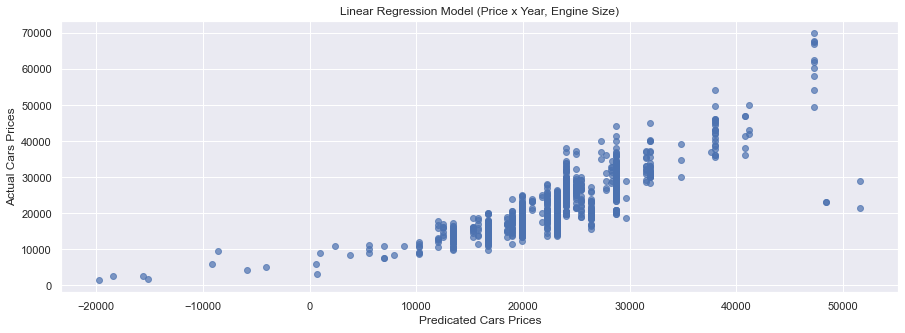

In [57]:
# Ploting the model predictions x actual values
actual_values = Y_test

plt.figure(figsize=(15, 5))
plt.scatter(linear_regression_model_2_predictions, actual_values, alpha=.7, color='b')
plt.title("Linear Regression Model (Price x Year, Engine Size)")
plt.xlabel("Predicated Cars Prices")
plt.ylabel("Actual Cars Prices")

plt.show()

**Printing a distribution plot comparing the results**

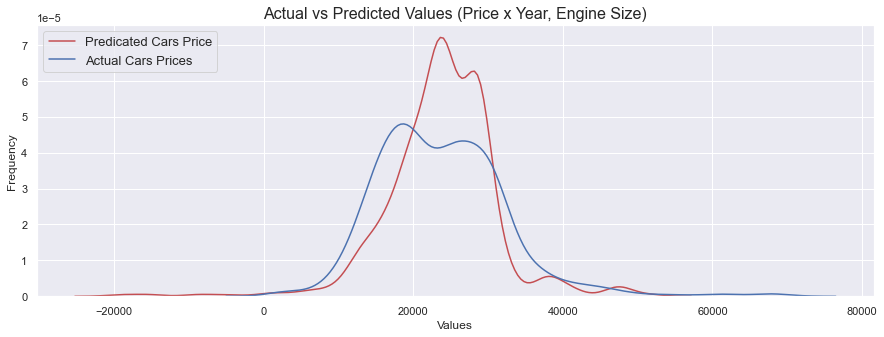

In [58]:
# Ploting distributon comparing predictions x actual values
sns.kdeplot(linear_regression_model_2_predictions, color = 'r', label = "Predicated Cars Price")
sns.kdeplot(actual_values, color = 'b', label = "Actual Cars Prices")
sns.set(rc={'figure.figsize':(5,5)})

plt.title('Actual vs Predicted Values (Price x Year, Engine Size)', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.show()

**Printing the obtained Linear Regression Model coefficients**

In [59]:
# Getting the Linear Regression Model coefficient list
feat = list(X_train.columns)
coef = linear_regression_model_2.coef_.transpose() #coef_ is a internal vector of the model with the Coefficients
coef_table = np.vstack((feat, coef)).T
linear_regression_feature_coeff_df_2 = pd.DataFrame(coef_table, columns=["Feature", "Coefficients"])

print("The Linear Regression Coefficients per Feature are:\n", linear_regression_feature_coeff_df_2)

The Linear Regression Coefficients per Feature are:
        Feature        Coefficients
0         Year  6829.9513425642035
1  Engine_size   4522.638191651382


### 6.4 Simple Linear Regression Model Performance Conclusion

We have evaluated 6 models with all significant independent variables to find the best fit models which can predict the dependent variable (in our case - the price for used cars) more precisely. 

As a result we have chosen 2 models - model 1 and model 5 with the highest r-squared to make a training models based on them

After training the models 1 and 5 we can stay the conclusion that **model 1 (Price x Year, Mileage, Engine Size)** will be the best regression model for price prediction, because compared to model 5: 

- it has the higher R-squared
- it has the lesser RMSE

In [60]:
Model_results_df = pd.DataFrame(columns=["Model", "R-square Train Set", "R-square Test Set", "RMSE"])
item = {"Model":"Simple Linear Regression (Price x Year, Mileage, Engine Size)",
        "R-square Train Set":r2_train,
        "R-square Test Set":r2_test,
        "RMSE":linear_regression_model_RMSE
       }
Model_results_df = Model_results_df.append(item, ignore_index=True)

item = {"Model":"Simple Linear Regression (Price x Year, Engine Size)",
        "R-square Train Set":r2_train_2,
        "R-square Test Set":r2_test_2,
        "RMSE":linear_regression_model_2_RMSE
       }
Model_results_df = Model_results_df.append(item, ignore_index=True)

pd.set_option('display.max_colwidth', None)
display(Model_results_df)

,Model,R-square Train Set,R-square Test Set,RMSE
0,"Simple Linear Regression (Price x Year, Mileage, Engine Size)",0.772876,0.736156,4431.701343
1,"Simple Linear Regression (Price x Year, Engine Size)",0.726094,0.684534,4845.885023


## 7. Modeling using Linear Regression Model with Ridge and Lasso

**Dividing Independent and Dependent Variables using all the features available in the data set**

- Dependent Variable: Price
- Independent Variable: all the other attributes

In [61]:
# Divide the dataset into features (independent variables) and response (dependent variable)
#OBS.: Using the complete input data set, with all features
response_ds = input_all_features_df["Price"]
features_ds = input_all_features_df.drop("Price", axis=1) #remove the dependent var from the feature dataset

**Performing Feature Scaling**

In [62]:
#Define Scaler Transformation
stdScaler = StandardScaler()

#Scales the features using Standardization (z-score)
zscore = stdScaler.fit_transform(features_ds)

#Create DataFrame again to recover columns names
features_ds = pd.DataFrame(zscore, index=features_ds.index, columns=features_ds.columns)
features_ds = features_ds.reset_index(drop=True)
display(features_ds.head())

,Year,Mileage,Engine_size,Automatic,Manual,Semi-Auto,Other_Transmission,Diesel,Hybrid,Petrol,Other_Fuel_Type
0,1.248672,-0.952972,-0.073215,1.182643,-0.232102,-1.065594,-0.016029,0.815536,-0.20088,-0.748546,-0.039289
1,1.248672,-0.962040,-1.101443,1.182643,-0.232102,-1.065594,-0.016029,-1.226188,-0.20088,1.335924,-0.039289
2,1.248672,-0.984709,-0.073215,1.182643,-0.232102,-1.065594,-0.016029,0.815536,-0.20088,-0.748546,-0.039289
3,0.775804,-0.780683,-0.073215,1.182643,-0.232102,-1.065594,-0.016029,0.815536,-0.20088,-0.748546,-0.039289
4,0.775804,-0.803353,-0.073215,1.182643,-0.232102,-1.065594,-0.016029,0.815536,-0.20088,-0.748546,-0.039289


**Spliting Dataset into Traning Data and Test Data**

In [63]:
#Split the data into different data frames randomly using random seed = 27 and relation training:test = 75:25 
X_train, X_test, Y_train, Y_test = train_test_split(features_ds, response_ds, test_size=0.25, random_state=27)

print("Train and testing data frames were split successfully")

print("X_train Shape:", X_train.shape, "\n")
print("Y_train Shape:", Y_train.shape, "\n")

print("X_test Shape:", X_test.shape, "\n")
print("Y_test Shape:", Y_test.shape, "\n")

Train and testing data frames were split successfully
X_train Shape: (2919, 11) 

Y_train Shape: (2919,) 

X_test Shape: (974, 11) 

Y_test Shape: (974,) 



### 7.1 Applying Ridge Regression

In the next steps, it will be trained a new model using all the features and the Ridge Regression. Several values of Alpha parameter are going to be tested to check the performance.

In [64]:
# Defining a set of alpha parameters
# The larger is alpha --> The lower is the coefficients influence 
alpha_ridge_set = [0.01, 0.1, 1, 100, 150, 160, 180, 200]
print("Alpha set:\n", alpha_ridge_set)

Alpha set:
 [0.01, 0.1, 1, 100, 150, 160, 180, 200]


In [65]:
#Defining lists to hold the values of R-Square and RMSE calculated for each alpha
r2_train_ridge_list = []
r2_test_ridge_list = []
rmse_ridge_list = []

#Running Ridge Regression using several Alphas
for alphaItem in alpha_ridge_set:
    #Create the model
    ridge_model = RidgeRegression(alpha = alphaItem, normalize = False, max_iter=10000)
    #Applying the Ridge Regression algorithm to train the model
    ridge_model.fit(X_train, Y_train)
    # Applying Test data frame and computing predictions running the Ridge Regression Model
    ridge_model_predictions = ridge_model.predict(X_test)

    # Computing the R^2 (Coefficient of Determination)
    r2_train_ridge_list.append(ridge_model.score(X_train, Y_train))
    r2_test_ridge_list.append(ridge_model.score(X_test, Y_test))    
    
    #Computing the RMSE (Root Mean Squared Error)
    ridge_regression_model_RMSE = mean_squared_error(Y_test, ridge_model_predictions)**0.5;
    #Appeding results to the lists    
    rmse_ridge_list.append(ridge_regression_model_RMSE)

#Creating a new DataFrame holding the results
ridge_results = np.vstack((alpha_ridge_set, r2_train_ridge_list, r2_test_ridge_list, rmse_ridge_list)).T
ridge_results_df = pd.DataFrame(ridge_results, columns=["Alpha", "R2_Train", "R2_Test", "RMSE"])
display(ridge_results_df)

,Alpha,R2_Train,R2_Test,RMSE
0,0.01,0.788402,0.752052,4296.124491
1,0.10,0.788402,0.752054,4296.110950
2,1.00,0.788402,0.752069,4295.976166
3,100.00,0.787752,0.753055,4287.426463
4,150.00,0.787007,0.753078,4287.226549
5,160.00,0.786829,0.753049,4287.474111
6,180.00,0.786447,0.752961,4288.238085
7,200.00,0.786031,0.752834,4289.346214


**Based on the results, the best performance applying Ridge Model was obtained using alpha equal to 150.**

In [66]:
item = {"Model":"Ridge Regression - alpha = 150 (Price x All Features)",
        "R-square Train Set":r2_train_ridge_list[4],
        "R-square Test Set":r2_test_ridge_list[4],
        "RMSE":rmse_ridge_list[4]
       }
Model_results_df = Model_results_df.append(item, ignore_index=True)

pd.set_option('display.max_colwidth', None)
display(Model_results_df)

,Model,R-square Train Set,R-square Test Set,RMSE
0,"Simple Linear Regression (Price x Year, Mileage, Engine Size)",0.772876,0.736156,4431.701343
1,"Simple Linear Regression (Price x Year, Engine Size)",0.726094,0.684534,4845.885023
2,Ridge Regression - alpha = 150 (Price x All Features),0.787007,0.753078,4287.226549


### 7.2 Applying Lasso Regression

In the next steps, it will be trained a new model using all the features and the Lasso Regression. Different values of Alpha parameter are going to be used to check the performance and compare it with Ridge Model.

In [67]:
# Defining a set of alpha parameters
# The larger is alpha --> The lower is the coefficients influence 
alpha_lasso_set = [0.01, 0.1, 1, 10, 50, 75, 100, 150]
print("Alpha set:\n", alpha_lasso_set)

Alpha set:
 [0.01, 0.1, 1, 10, 50, 75, 100, 150]


In [68]:
#Defining lists to hold the values of R-Square and RMSE calculated for each alpha
r2_train_lasso_list = []
r2_test_lasso_list = []
rmse_lasso_list = []

#Running Lasso Regression using several Alphas
for alphaItem in alpha_lasso_set:
    #Create the model
    lasso_model = LassoRegression(alpha = alphaItem, normalize = False, max_iter=10000)
    #Applying the Lasso Regression algorithm to train the model
    lasso_model.fit(X_train, Y_train)
    # Applying Test data frame and computing predictions running the Lasso Regression Model
    lasso_model_predictions = lasso_model.predict(X_test)

    # Computing the R^2 (Coefficient of Determination)
    r2_train_lasso_list.append(lasso_model.score(X_train, Y_train))
    r2_test_lasso_list.append(lasso_model.score(X_test, Y_test))    
    
    #Computing the RMSE (Root Mean Squared Error)
    lasso_regression_model_RMSE = mean_squared_error(Y_test, lasso_model_predictions)**0.5;
    #Appeding results to the lists    
    rmse_lasso_list.append(lasso_regression_model_RMSE)

#Creating a new DataFrame holding the results
lasso_results = np.vstack((alpha_lasso_set, r2_train_lasso_list, r2_test_lasso_list, rmse_lasso_list)).T
lasso_results_df = pd.DataFrame(lasso_results, columns=["Alpha", "R2_Train", "R2_Test", "RMSE"])
display(lasso_results_df)

,Alpha,R2_Train,R2_Test,RMSE
0,0.01,0.788402,0.752052,4296.124787
1,0.10,0.788402,0.752053,4296.113880
2,1.00,0.788402,0.752066,4296.002371
3,10.00,0.788394,0.752186,4294.960598
4,50.00,0.788204,0.752568,4291.655545
5,75.00,0.787979,0.752654,4290.908678
6,100.00,0.787690,0.752640,4291.025317
7,150.00,0.787024,0.752570,4291.630996


**Based on the results, the best performance applying Lasso Model was obtained using alpha equal to 50.**

In [69]:
item = {"Model":"Lasso Regression - alpha = 75 (Price x All Features)",
        "R-square Train Set":r2_train_lasso_list[5],
        "R-square Test Set":r2_test_lasso_list[5],
        "RMSE":rmse_lasso_list[5]
       }
Model_results_df = Model_results_df.append(item, ignore_index=True)

pd.set_option('display.max_colwidth', None)
display(Model_results_df)

,Model,R-square Train Set,R-square Test Set,RMSE
0,"Simple Linear Regression (Price x Year, Mileage, Engine Size)",0.772876,0.736156,4431.701343
1,"Simple Linear Regression (Price x Year, Engine Size)",0.726094,0.684534,4845.885023
2,Ridge Regression - alpha = 150 (Price x All Features),0.787007,0.753078,4287.226549
3,Lasso Regression - alpha = 75 (Price x All Features),0.787979,0.752654,4290.908678


### 7.3 Comparing Ridge Regression and Lasso Regression - Conclusion

Based on the values of R-Square and RMSE computed before, the performance obtained applying the Ridge Regression Model using alpha equal to 150 was the best one comparing Ridge and Lasso Models.

## 8. Modeling using Polynomial Regression

Polynomial Regression will be performed based on the best linear regression model so far, using 3 features: Year, Milleage, and Engine_size.

We will perform polynomial regression as there is a chance that the linear regression performed with a certain level of polynomial degrees will give us better prediction model performance of the resale price.

### 8.1 Applying Simple Polynomial Regression Model using Year, Mileage, and Engine Size and different degrees

**Dividing Independent and Dependent Variables**

- Dependent Variable: Price
- Independent Variable: Other attributes (Year, Mileage, Engine Size)

In [70]:
# Divide the dataset into features (independent variables) and response (dependent variable)
response_ds = input_df["Price"]
features_ds = input_df.drop("Price", axis=1) #remove the dependent var from the feature dataset

**Performing Feature Scaling**

In [71]:
#Define Scaler Transformation
stdScaler = StandardScaler()

#Scales the features using Standardization (z-score)
zscore = stdScaler.fit_transform(features_ds)

#Create DataFrame again to recover columns names
features_ds = pd.DataFrame(zscore, index=features_ds.index, columns=features_ds.columns)
features_ds = features_ds.reset_index(drop=True)
display(features_ds.head())

,Year,Mileage,Engine_size
0,1.248672,-0.952972,-0.073215
1,1.248672,-0.962040,-1.101443
2,1.248672,-0.984709,-0.073215
3,0.775804,-0.780683,-0.073215
4,0.775804,-0.803353,-0.073215


**Defining a set of degrees to apply**

In [72]:
# Defining a set of alpha parameters
#Obs.: Using 1 degree is the same as not include any new feature
poly_feature_degree_set = [1, 2, 3, 4, 5]
print("Polynomial Degrees set:\n", poly_feature_degree_set)

Polynomial Degrees set:
 [1, 2, 3, 4, 5]


**Creating new features using polynomial feature transformation and perform Linear Regression**

In [73]:
#Defining lists to hold the values of R-Square and RMSE calculated for each degree
r2_train_poly_feat_list = []
r2_test_poly_feat_list = []
rmse_poly_feat_list = []

#Running Polynomial Regression using several degrees
for degreeItem in poly_feature_degree_set:

    #Creating the polynomial array
    poly_features = PolynomialFeatures(degree=degreeItem, include_bias=False)
    #Transforming the features vector
    features_pol = poly_features.fit_transform(features_ds)

    #Split the data into different data frames randomly using random seed = 27 and relation training:test = 75:25 
    X_train, X_test, Y_train, Y_test = train_test_split(features_pol, response_ds, test_size=0.25, random_state=27)

    #Applying the Simple Polynomial Linear Regression algorithm to train the model
    polynomial_linear_regression_model = LinearRegression()
    polynomial_linear_regression_model.fit(X_train, Y_train)

    # Applying Test data frame and computing predictions running the Multilinear Regression Model 
    polynomial_linear_regression_model_predictions = polynomial_linear_regression_model.predict(X_test)

    # Computing the R^2 (Coefficient of Determination)
    r2_train_poly_feat_list.append(polynomial_linear_regression_model.score(X_train, Y_train))
    r2_test_poly_feat_list.append(polynomial_linear_regression_model.score(X_test, Y_test))

    #Computing the RMSE (Root Mean Squared Error)
    rmse_poly_feat_list.append(mean_squared_error(Y_test, polynomial_linear_regression_model_predictions)**0.5)

#Creating a new DataFrame holding the results
poly_features_results = np.vstack((poly_feature_degree_set, 
                                   r2_train_poly_feat_list, 
                                   r2_test_poly_feat_list, 
                                   rmse_poly_feat_list)).T
poly_features_results_df = pd.DataFrame(poly_features_results, columns=["Degree", "R2_Train", "R2_Test", "RMSE"])
display(poly_features_results_df)

,Degree,R2_Train,R2_Test,RMSE
0,1.0,0.772876,0.736156,4431.701343
1,2.0,0.859903,0.831470,3541.885793
2,3.0,0.891841,0.877496,3019.752560
3,4.0,0.898262,0.885361,2921.211998
4,5.0,0.901053,0.862916,3194.402749


**Based on the results, the best performance applying Multinear Polynomial Regression was obtained using degree equal to 4.**

In [74]:
item = {"Model":"Simple Polynomial Regression - degree = 4 (Price x Year, Mileage, and Engine Size)",
        "R-square Train Set":r2_train_poly_feat_list[3],
        "R-square Test Set":r2_test_poly_feat_list[3],
        "RMSE":rmse_poly_feat_list[3]
       }
Model_results_df = Model_results_df.append(item, ignore_index=True)

pd.set_option('display.max_colwidth', None)
display(Model_results_df)

,Model,R-square Train Set,R-square Test Set,RMSE
0,"Simple Linear Regression (Price x Year, Mileage, Engine Size)",0.772876,0.736156,4431.701343
1,"Simple Linear Regression (Price x Year, Engine Size)",0.726094,0.684534,4845.885023
2,Ridge Regression - alpha = 150 (Price x All Features),0.787007,0.753078,4287.226549
3,Lasso Regression - alpha = 75 (Price x All Features),0.787979,0.752654,4290.908678
4,"Simple Polynomial Regression - degree = 4 (Price x Year, Mileage, and Engine Size)",0.898262,0.885361,2921.211998


### 8.2 Creating Learning Curves to compare Polynomial Regression (4 degree) and Linear Regression performance

In [75]:
# Defining function to plot Learning Curves for a Regression Model
def plot_learning_curves(model, features, response):
    
    X_train, X_test, Y_train, Y_test = train_test_split(features,response,test_size=0.25, random_state=27)
    train_errors = []
    test_errors = []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m],Y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(Y_train[:m],y_train_predict)**0.5)
        test_errors.append(mean_squared_error(Y_test,y_test_predict)**0.5)

    plt.figure(figsize=(15, 5))        
    plt.plot(train_errors,"r-+",linewidth=2,label="train")
    plt.plot(test_errors,"b-",linewidth=3,label="test")
    plt.gca().legend(('Train','Test'))
    #plt.legend()
    plt.xlabel('Data set size')
    plt.ylabel('RMSE')
    plt.title("Learning Curves")
    plt.ylim([0,8000])
    plt.show()

In [76]:
# Divide the dataset into features (Year, Mileage, Engine_size) and response (Price)
response_ds = input_df["Price"]
features_ds = input_df.drop("Price", axis=1) #remove the dependent var from the feature dataset

In [77]:
#Define Scaler Transformation
stdScaler = StandardScaler()

#Scales the features using Standardization (z-score)
zscore = stdScaler.fit_transform(features_ds)

#Create DataFrame again to recover columns names
features_ds = pd.DataFrame(zscore, index=features_ds.index, columns=features_ds.columns)
features_ds = features_ds.reset_index(drop=True)

Learning curves for Simple Linear Regression


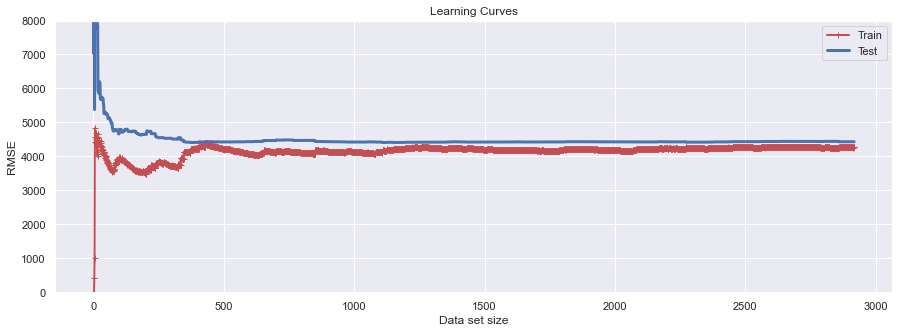

In [78]:
#Creating Learning Curve for the Simples Linear Regression
lin_reg = LinearRegression()

print("Learning curves for Simple Linear Regression")
plot_learning_curves(lin_reg,features_ds,response_ds)

Learning curves for Linear Polynomial Regression with 3 degrees


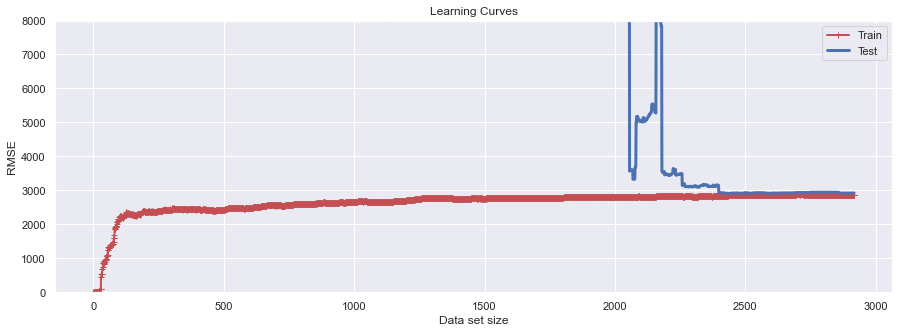

In [79]:
#Creating the polynomial array
poly_features = PolynomialFeatures(degree=4, include_bias=False)
#Transforming the features vector
features_pol = poly_features.fit_transform(features_ds)
lin_reg = LinearRegression()

print("Learning curves for Linear Polynomial Regression with 3 degrees")
plot_learning_curves(lin_reg, features_pol, response_ds)

**Conclusion**

The plots of Learning Curves using Simple Linear Regression model demonstrated that RMSE of Training and Testing data sets are quite close to each other. Moreover, they get closer along that new curves of dataset learning are computed.

We can observe the same result on the learning curves applying Linear Regression with Polynomial Features (Polynomial Regression) with 3 degrees. Although, in the Polynomial Regression model's learning curves, we can see that the final RMSE is lower than the one obtained using Simple Linear Regression model. 

### 8.3 Comparing Polynomial Regression, Ridge Regression, Lasso Regression and Simple Linear Regression Models - Conclusion

In [80]:
pd.set_option('display.max_colwidth', None)
display(Model_results_df)

,Model,R-square Train Set,R-square Test Set,RMSE
0,"Simple Linear Regression (Price x Year, Mileage, Engine Size)",0.772876,0.736156,4431.701343
1,"Simple Linear Regression (Price x Year, Engine Size)",0.726094,0.684534,4845.885023
2,Ridge Regression - alpha = 150 (Price x All Features),0.787007,0.753078,4287.226549
3,Lasso Regression - alpha = 75 (Price x All Features),0.787979,0.752654,4290.908678
4,"Simple Polynomial Regression - degree = 4 (Price x Year, Mileage, and Engine Size)",0.898262,0.885361,2921.211998


**Final Conclusion**

The comparison table shows that the Polynomial Regression using 4 degrees has the lowest RMSE and highest R-Square computed using the Test data set. Based on that, it is possible to conclude that the **Polynomial Regression using 4 degrees** has the best performance among all the models tested.

In addition, based on RMSE and Test Set R-squared, the Polynomial Regression model showed much better results than the Linear Regression, Ridge Regression, and Lasso Regression models. This statement attests to the feasibility of using the Polynomial Features approach in this case.

**Plotting the Actual Prices and Predicted Prices using the Polynomial Regression using 4 degrees model**

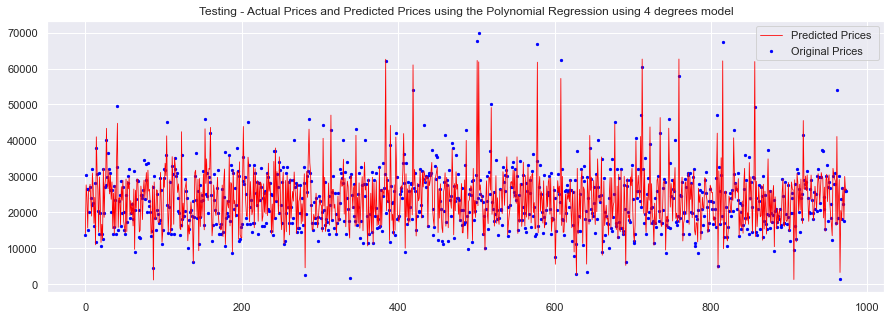

In [81]:
# Divide the dataset into features (independent variables) and response (dependent variable)
response_ds = input_df["Price"]
features_ds = input_df.drop("Price", axis=1) #remove the dependent var from the feature dataset

#Define Scaler Transformation
stdScaler = StandardScaler()
#Scales the features using Standardization (z-score)
zscore = stdScaler.fit_transform(features_ds)
#Create DataFrame again to recover columns names
features_ds = pd.DataFrame(zscore, index=features_ds.index, columns=features_ds.columns)
features_ds = features_ds.reset_index(drop=True)

#Creating the polynomial array
poly_features = PolynomialFeatures(degree=4, include_bias=False)
#Transforming the features vector
features_pol = poly_features.fit_transform(features_ds)

#Split the data into different data frames randomly using random seed = 27 and relation training:test = 75:25 
X_train, X_test, Y_train, Y_test = train_test_split(features_pol, response_ds, test_size=0.25, random_state=27)

#Applying the Simple Polynomial Linear Regression algorithm to train the model
polynomial_linear_regression_model = LinearRegression()
polynomial_linear_regression_model.fit(X_train, Y_train)

# Applying Test data frame and computing predictions running the Simple Regression Model 
polynomial_linear_regression_model_predictions = polynomial_linear_regression_model.predict(X_test)

#Plotting the Actual Prices and Predicted Prices using the Polynomial Regression using 3 degrees model  
x_axis = range(len(polynomial_linear_regression_model_predictions))

plt.figure(figsize=(15, 5)) 
plt.scatter(x_axis, Y_test, s=5, color="blue", label="Original Prices")
plt.plot(x_axis, polynomial_linear_regression_model_predictions, lw=0.8, color="red", label="Predicted Prices ")
plt.title("Testing - Actual Prices and Predicted Prices using the Polynomial Regression using 4 degrees model")
plt.legend()
plt.show()

**Scatter Plot of the Polynomial Regression (4 degree)**

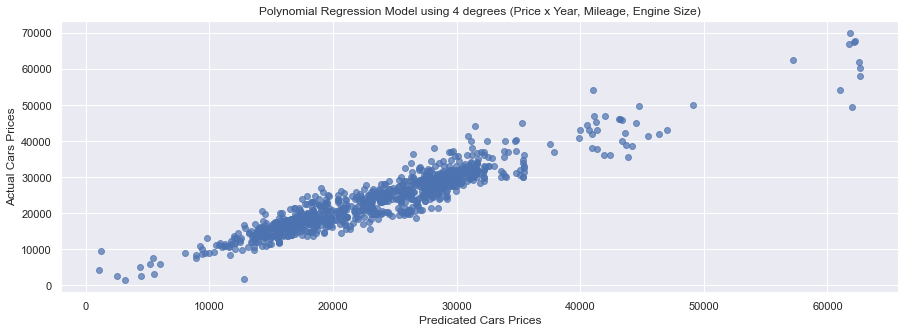

In [82]:
# Ploting the model predictions x actual values
actual_values = Y_test

plt.figure(figsize=(15, 5))
plt.scatter(polynomial_linear_regression_model_predictions, actual_values, alpha=.7, color='b')
plt.title("Polynomial Regression Model using 4 degrees (Price x Year, Mileage, Engine Size)")
plt.xlabel("Predicated Cars Prices")
plt.ylabel("Actual Cars Prices")

plt.show()

**Printing a distribution plot comparing the results**

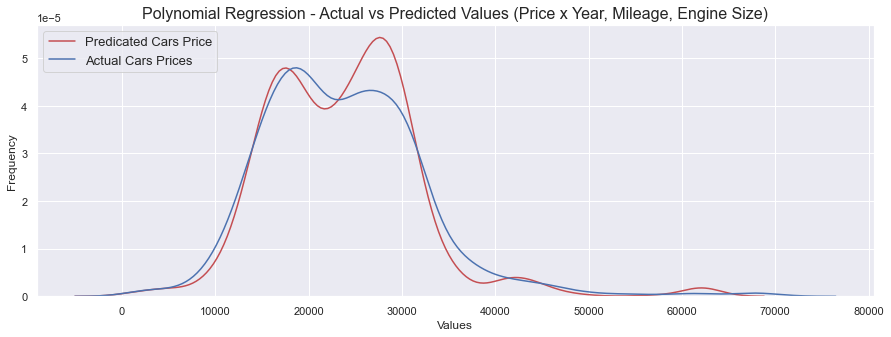

In [84]:
# Ploting distributon comparing predictions x actual values
sns.kdeplot(polynomial_linear_regression_model_predictions, color = 'r', label = "Predicated Cars Price")
sns.kdeplot(actual_values, color = 'b', label = "Actual Cars Prices")
sns.set(rc={'figure.figsize':(15,5)})

plt.title('Polynomial Regression - Actual vs Predicted Values (Price x Year, Mileage, Engine Size)', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

plt.show()